In [32]:
!pip3 install pandasql
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
import matplotlib.pyplot as plt
import pandasql as psql

In [33]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Formula%20One/drivers.csv")
constructors_df=data.copy()
constructors_df.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [34]:
constructors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     854 non-null    int64 
 1   driverRef    854 non-null    object
 2   number       854 non-null    object
 3   code         854 non-null    object
 4   forename     854 non-null    object
 5   surname      854 non-null    object
 6   dob          854 non-null    object
 7   nationality  854 non-null    object
 8   url          854 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.2+ KB


In [35]:
q3 = '''SELECT COUNT(DISTINCT nationality) as num_of_nationalities
FROM constructors_df'''

constructor_nationalities = psql.sqldf(q3, locals())
constructor_nationalities

,num_of_nationalities
0,42


In [36]:
q4 = '''SELECT nationality, COUNT(nationality) as frequency_of_nationalities, (COUNT(nationality) / 211.0) * 100 as percent_of_total
FROM constructors_df
GROUP BY nationality
ORDER BY COUNT(nationality) DESC
LIMIT 10'''

q4_1 = '''WITH cte as (
	SELECT ROW_NUMBER() OVER(ORDER BY COUNT(nationality) DESC) as row_num, nationality, COUNT(nationality) as frequency_of_nationalities
	FROM constructors_df
	GROUP BY nationality
),
not_top_ten as (
	SELECT nationality, frequency_of_nationalities, frequency_of_nationalities / 854.0 * 100 as percent_of_total
	FROM cte
	WHERE row_num >= 10
)
SELECT 'Other' as nationality, SUM(frequency_of_nationalities) as frequency_of_nationalities, SUM(percent_of_total) as percent_of_total
FROM not_top_ten'''

constructor_nationalities_freq = psql.sqldf(q4, locals())
not_top_ten = psql.sqldf(q4_1, locals())

constructor_nationalities_freq = pd.concat([constructor_nationalities_freq, not_top_ten])
constructor_nationalities_freq

,nationality,frequency_of_nationalities,percent_of_total
0,British,165,78.199052
1,American,157,74.407583
2,Italian,99,46.919431
3,French,73,34.597156
4,German,50,23.696682
5,Brazilian,32,15.165877
6,Argentine,24,11.374408
7,Swiss,23,10.900474
8,South African,23,10.900474
9,Belgian,23,10.900474


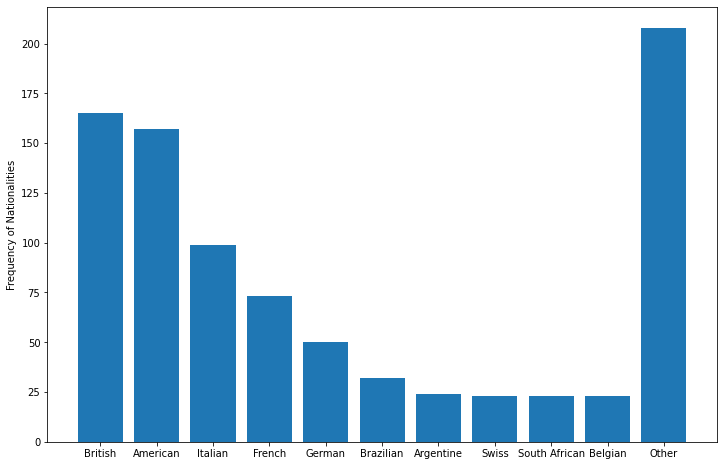

In [37]:
nationalities = constructor_nationalities_freq['nationality'].tolist()
nationalities_freq = constructor_nationalities_freq['frequency_of_nationalities'].tolist()

plt.figure(figsize=(12,8))
plt.ylabel('Frequency of Nationalities')
plt.bar(nationalities, nationalities_freq)

plt.show()

In [38]:
data=pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Formula%20One/driver_standings.csv')
driver_standings_df=data.copy()
driver_standings_df.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [39]:
driver_standings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33686 entries, 0 to 33685
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  33686 non-null  int64  
 1   raceId             33686 non-null  int64  
 2   driverId           33686 non-null  int64  
 3   points             33686 non-null  float64
 4   position           33686 non-null  int64  
 5   positionText       33686 non-null  object 
 6   wins               33686 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.8+ MB


In [40]:
data=pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Formula%20One/results.csv')
results_df=data.copy()
results_df.sample(10)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
24341,24347,1017,822,131,77,2,2,2,2,18.0,53,+18.056,5089254,43,3,1:33.586,224.725,1
15732,15733,636,289,34,7,4,\N,R,16,0.0,34,\N,\N,\N,\N,\N,\N,108
5044,5045,253,14,3,6,1,3,3,3,4.0,67,+35.382,6034426,\N,\N,\N,\N,1
23535,23540,841,39,164,22,0,\N,F,24,0.0,0,\N,\N,\N,0,\N,\N,81
13474,13475,551,232,37,37,18,\N,R,18,0.0,27,\N,\N,\N,\N,\N,\N,6
5966,5967,287,100,33,20,21,\N,R,21,0.0,17,\N,\N,\N,\N,\N,\N,5
20054,20055,834,498,105,2,3,\N,R,10,0.0,1,\N,\N,\N,\N,\N,\N,3
1228,1229,75,13,15,12,10,11,11,11,0.0,63,\N,\N,51,10,1:16.802,216.884,46
18650,18651,772,600,87,27,23,\N,R,16,0.0,4,\N,\N,\N,\N,\N,\N,48
10802,10803,457,118,53,35,22,7,7,7,0.0,40,+1:58.539,5350041,\N,\N,\N,\N,1


In [41]:
results_df.loc[(results_df.time == r'\N'), 'time'] = np.nan
results_df.loc[(results_df.fastestLapTime == r'\N'), 'fastestLapTime'] = np.nan

results_df['number'] = results_df['number'].apply(pd.to_numeric, errors='coerce')
results_df['rank'] = results_df['rank'].apply(pd.to_numeric, errors='coerce')
results_df['milliseconds'] = results_df['milliseconds'].apply(pd.to_numeric, errors='coerce')
results_df['fastestLap'] = results_df['fastestLap'].apply(pd.to_numeric, errors='coerce')
results_df['fastestLapSpeed'] = results_df['fastestLapSpeed'].apply(pd.to_numeric, errors='coerce')

results_df=results_df.drop(columns=['position'])

results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25660 entries, 0 to 25659
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25660 non-null  int64  
 1   raceId           25660 non-null  int64  
 2   driverId         25660 non-null  int64  
 3   constructorId    25660 non-null  int64  
 4   number           25654 non-null  float64
 5   grid             25660 non-null  int64  
 6   positionText     25660 non-null  object 
 7   positionOrder    25660 non-null  int64  
 8   points           25660 non-null  float64
 9   laps             25660 non-null  int64  
 10  time             6964 non-null   object 
 11  milliseconds     6963 non-null   float64
 12  fastestLap       7206 non-null   float64
 13  rank             7411 non-null   float64
 14  fastestLapTime   7206 non-null   object 
 15  fastestLapSpeed  7206 non-null   float64
 16  statusId         25660 non-null  int64  
dtypes: float64(6

In [42]:
data=pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Formula%20One/races.csv')
races_df=data.copy()
races_df.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [43]:
races_df.loc[(races_df.time == r'\N'), 'time'] = np.nan

races_df['date'] = races_df['date'].apply(pd.to_datetime, errors='coerce')

races_df.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
